# TWEET SENTIMENT ANALYSIS

### Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.stem.porter import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

### Reading csv

In [18]:
Final_df=pd.read_csv("tweets-engagement-metrics.csv")

In [19]:
Final_df.head()

,Unnamed: 0,UserID,Gender,LocationID,City,State,StateCode,Country,TweetID,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text
0,0,tw-1267804344,Unknown,1.0,Elbasan,Elbasan,AL,Albania,tw-698155297102295041,7,12,Friday,True,339.0,127.0,0.0,44.0,0.0,en,"""RT @AdrianRusso82: Our Innovation Lab is offi..."
1,1,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-685159757209059329,11,7,Thursday,False,87.0,0.0,0.0,22.0,0.0,en,Now Open AWS Asia Pacific (Seoul) Region via ...
2,2,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-686907710311378944,6,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,A Beginner's Guide to Scaling to 11 Million+ U...
3,3,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-686968158050201600,10,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,Bridging AWS and Azure environments via VPN vi...
4,4,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-690210449674092545,9,21,Thursday,False,85.0,0.0,0.0,21.0,0.0,en,ELK on AWS ElasticSearch Service + ElasticBean...


In [20]:
Final_df=Final_df.drop('Unnamed: 0',axis=1)
Final_df

,UserID,Gender,LocationID,City,State,StateCode,Country,TweetID,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text
0,tw-1267804344,Unknown,1.0,Elbasan,Elbasan,AL,Albania,tw-698155297102295041,7,12,Friday,True,339.0,127.0,0.0,44.0,0.0,en,"""RT @AdrianRusso82: Our Innovation Lab is offi..."
1,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-685159757209059329,11,7,Thursday,False,87.0,0.0,0.0,22.0,0.0,en,Now Open AWS Asia Pacific (Seoul) Region via ...
2,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-686907710311378944,6,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,A Beginner's Guide to Scaling to 11 Million+ U...
3,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-686968158050201600,10,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,Bridging AWS and Azure environments via VPN vi...
4,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-690210449674092545,9,21,Thursday,False,85.0,0.0,0.0,21.0,0.0,en,ELK on AWS ElasticSearch Service + ElasticBean...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102057,tw-8184962,Male,6288.0,Harare,Harare Province,ZW,Zimbabwe,tw-696378029526933504,10,7,Sunday,True,1203.0,3.0,0.0,44.0,3.0,en,RT @Springcoil: Does anyone have a good workfl...
102058,tw-2510632527,Unknown,6288.0,Harare,Harare Province,ZW,Zimbabwe,tw-686895097175228416,5,12,Tuesday,True,976.0,102.0,0.0,31.0,0.0,en,RT @linuxacademyCOM: AWS CSA Associate and Pro...
102059,tw-148753637,Unknown,6288.0,Harare,Harare Province,ZW,Zimbabwe,tw-709632884269785088,0,15,Tuesday,False,4876.0,0.0,0.0,49.0,1.0,en,Curious @benthompson does this change your opi...
102060,tw-448919812,Unisex,6288.0,Harare,Harare Province,ZW,Zimbabwe,tw-705055534920163328,8,2,Wednesday,True,188.0,5.0,0.0,37.0,0.0,en,RT @awscloud: New on the AWS Startup Blog - Wh...


## Understanding the structure of the Data

In [22]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102062 entries, 0 to 102061
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UserID        102062 non-null  object 
 1   Gender        102062 non-null  object 
 2   LocationID    102062 non-null  float64
 3   City          99783 non-null   object 
 4   State         100165 non-null  object 
 5   StateCode     100336 non-null  object 
 6   Country       102062 non-null  object 
 7   TweetID       102062 non-null  object 
 8   Hour          102062 non-null  int64  
 9   Day           102062 non-null  int64  
 10  Weekday       102062 non-null  object 
 11  IsReshare     102062 non-null  bool   
 12  Reach         102062 non-null  float64
 13  RetweetCount  102062 non-null  float64
 14  Likes         102062 non-null  float64
 15  Klout         102062 non-null  float64
 16  Sentiment     102062 non-null  float64
 17  Lang          102062 non-null  object 
 18  text

In [23]:
Final_df.describe()

,LocationID,Hour,Day,Reach,RetweetCount,Likes,Klout,Sentiment
count,102062.000000,102062.000000,102062.000000,1.020620e+05,102062.000000,102062.000000,102062.000000,102062.000000
mean,2836.207687,11.416149,15.898709,8.426389e+03,7.986449,0.149684,40.409986,0.380754
std,1330.294460,6.062294,8.401409,8.777762e+04,96.914644,2.557491,13.652028,1.046501
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,-6.000000
25%,1601.000000,7.000000,9.000000,1.520000e+02,0.000000,0.000000,32.000000,0.000000
50%,3738.000000,11.000000,16.000000,4.540000e+02,0.000000,0.000000,43.000000,0.000000
75%,3774.000000,16.000000,23.000000,1.519000e+03,3.000000,0.000000,49.000000,0.600000
max,6289.000000,23.000000,31.000000,1.034245e+07,26127.000000,133.000000,99.000000,7.333333


In [24]:
Final_df.shape

(102062, 19)

In [25]:
Final_df.columns

Index(['UserID', 'Gender', 'LocationID', 'City', 'State', 'StateCode',
       'Country', 'TweetID', 'Hour', 'Day', 'Weekday', 'IsReshare', 'Reach',
       'RetweetCount', 'Likes', 'Klout', 'Sentiment', 'Lang', 'text'],
      dtype='object')


## Handling the missing values

In [27]:
missing_values = Final_df.isnull().sum()
missing_values

UserID             0
Gender             0
LocationID         0
City            2279
State           1897
StateCode       1726
Country            0
TweetID            0
Hour               0
Day                0
Weekday            0
IsReshare          0
Reach              0
RetweetCount       0
Likes              0
Klout              0
Sentiment          0
Lang               0
text               0
dtype: int64

In [28]:
Final_df.dropna(inplace=True)
Final_df

,UserID,Gender,LocationID,City,State,StateCode,Country,TweetID,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text
0,tw-1267804344,Unknown,1.0,Elbasan,Elbasan,AL,Albania,tw-698155297102295041,7,12,Friday,True,339.0,127.0,0.0,44.0,0.0,en,"""RT @AdrianRusso82: Our Innovation Lab is offi..."
1,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-685159757209059329,11,7,Thursday,False,87.0,0.0,0.0,22.0,0.0,en,Now Open AWS Asia Pacific (Seoul) Region via ...
2,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-686907710311378944,6,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,A Beginner's Guide to Scaling to 11 Million+ U...
3,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-686968158050201600,10,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,Bridging AWS and Azure environments via VPN vi...
4,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-690210449674092545,9,21,Thursday,False,85.0,0.0,0.0,21.0,0.0,en,ELK on AWS ElasticSearch Service + ElasticBean...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102057,tw-8184962,Male,6288.0,Harare,Harare Province,ZW,Zimbabwe,tw-696378029526933504,10,7,Sunday,True,1203.0,3.0,0.0,44.0,3.0,en,RT @Springcoil: Does anyone have a good workfl...
102058,tw-2510632527,Unknown,6288.0,Harare,Harare Province,ZW,Zimbabwe,tw-686895097175228416,5,12,Tuesday,True,976.0,102.0,0.0,31.0,0.0,en,RT @linuxacademyCOM: AWS CSA Associate and Pro...
102059,tw-148753637,Unknown,6288.0,Harare,Harare Province,ZW,Zimbabwe,tw-709632884269785088,0,15,Tuesday,False,4876.0,0.0,0.0,49.0,1.0,en,Curious @benthompson does this change your opi...
102060,tw-448919812,Unisex,6288.0,Harare,Harare Province,ZW,Zimbabwe,tw-705055534920163328,8,2,Wednesday,True,188.0,5.0,0.0,37.0,0.0,en,RT @awscloud: New on the AWS Startup Blog - Wh...


In [29]:
Final_df.shape

(99768, 19)

## Visualisation

### Gender

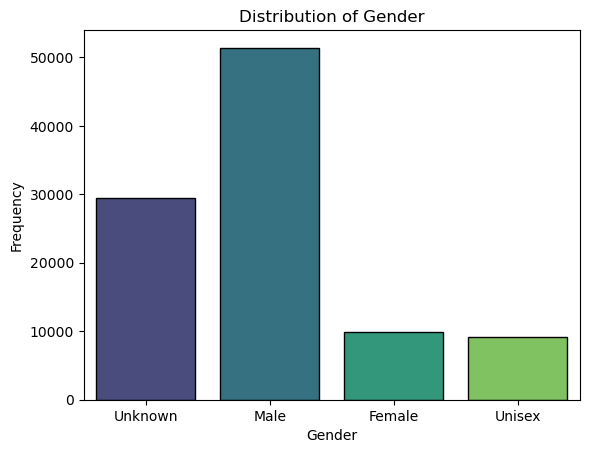

In [32]:
gender_distribution = Final_df['Gender']

sns.countplot(x=gender_distribution,edgecolor='black',palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()


#### Inference:
Data shows significant male skewness & 'Unknown' presence, but engagement within identified genders appears balanced.

### Hour 

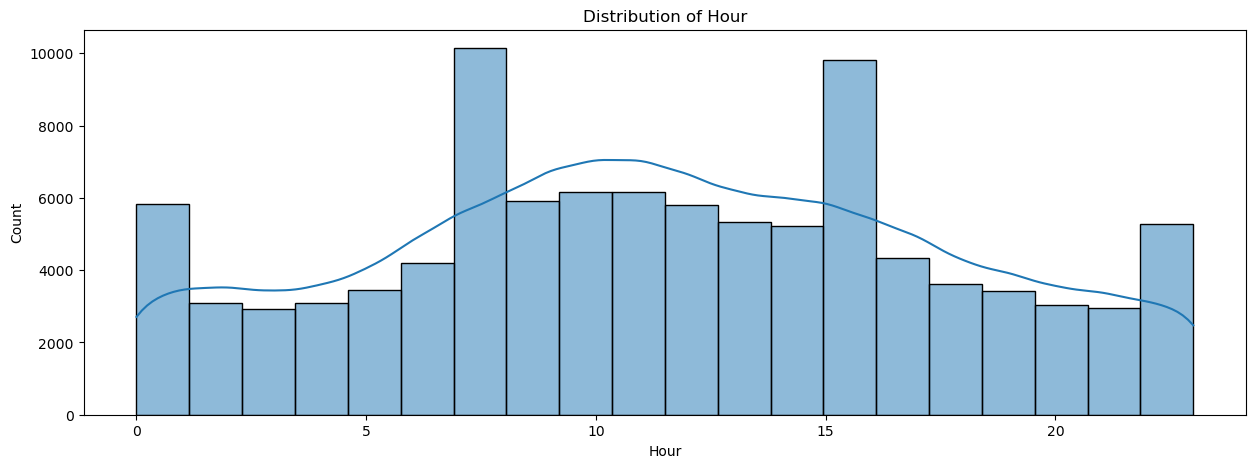

In [35]:
plt.figure(figsize=(15, 5))
sns.histplot(Final_df['Hour'], bins=20, kde=True)
plt.title(f'Distribution of Hour')

plt.show()

#### Inferences:
The distribution of Hour shows that there is a peak in the afternoon.
There is also a smaller peak in the evening.

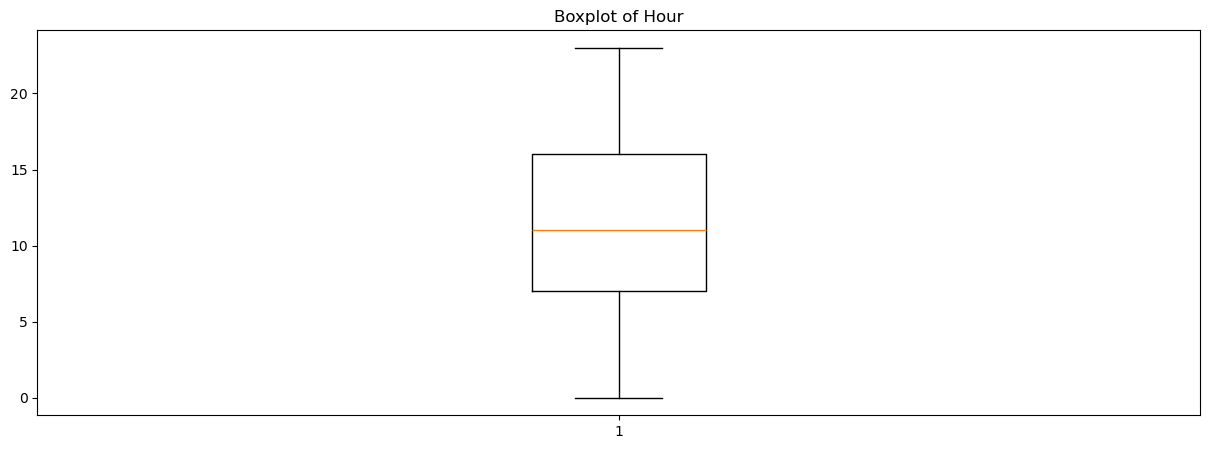

In [37]:
plt.figure(figsize=(15, 5))
plt.boxplot(Final_df['Hour'])
plt.title('Boxplot of Hour')

plt.show()

#### Inferences:
The boxplot suggests two peaks: a larger one in the afternoon and a smaller one in the evening. The distribution is bimodal, symmetric, and includes a few outliers.

### Day

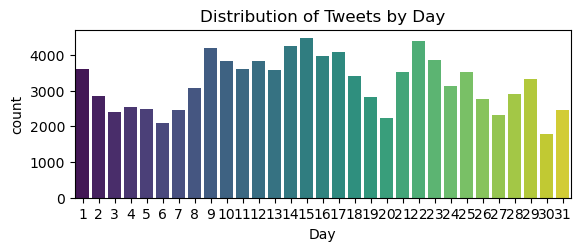

In [40]:
# Distribution of Tweets by Day
plt.subplot(2, 1, 1)
sns.countplot(x='Day', data=Final_df, palette='viridis')
plt.title('Distribution of Tweets by Day')
plt.show()

#### Inference:
Tweets peak on Sun-mornings & evenings, hinting at weekend joy & workday neutrality, with potential Sunday language shift.

### Weekday

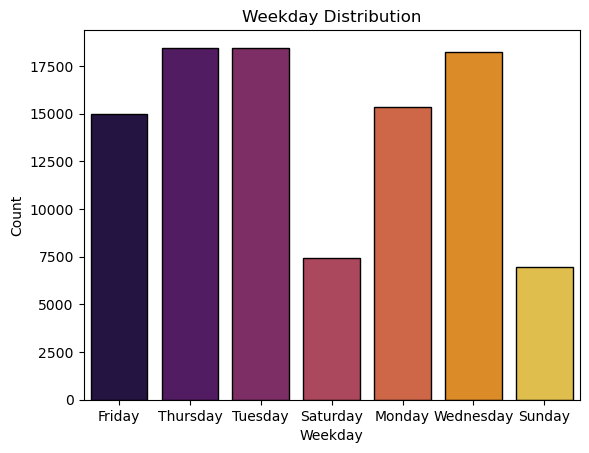

In [43]:
weekday_distribution = Final_df['Weekday']

sns.countplot(x=weekday_distribution, edgecolor='black',palette='inferno')
plt.title('Weekday Distribution')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()


#### Inference:
The distribution of Day shows that there is a slight peak in the number of users on Saturdays and Sundays.
This is likely because these are the weekends.
There is also a small peak in the number of users on Fridays.

### Klout

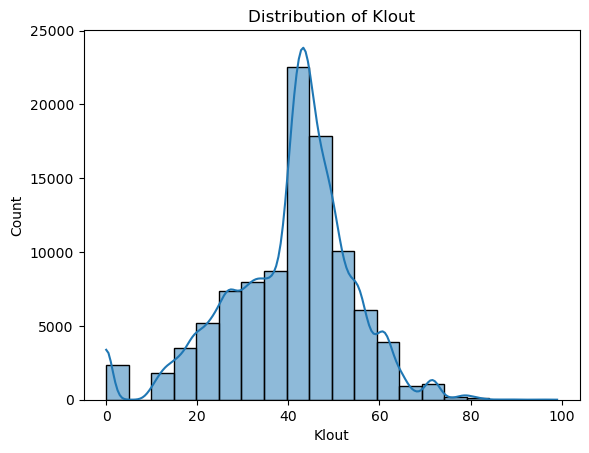

In [46]:
sns.histplot(Final_df['Klout'], bins=20, kde=True)
plt.title('Distribution of Klout')
plt.show()

#### Inferences:
  Klout scores are calculated is biased towards people who have a lot of followers and who are very active on social media.

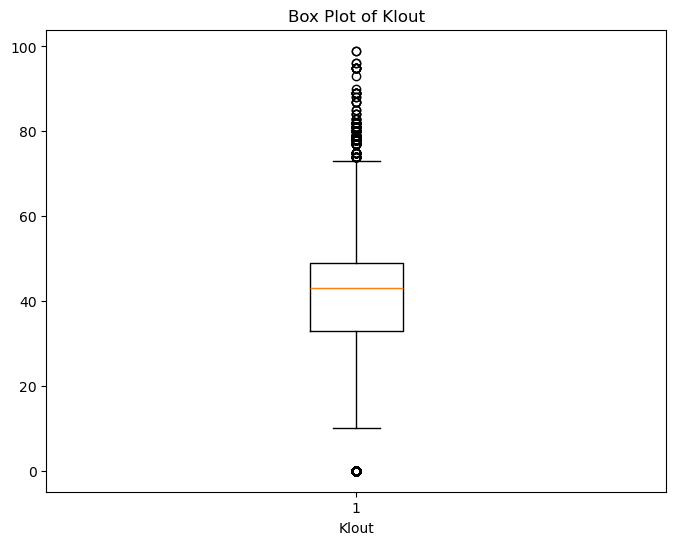

In [48]:
plt.figure(figsize=(8, 6))
plt.boxplot(Final_df['Klout'])
plt.title('Box Plot of Klout')
plt.xlabel('Klout')
plt.show()

#### Inferences:
Most people have a relatively low Klout score, but there are a few people with very high Klout scores.

### Klout Per Country

In [51]:
kpc = Final_df.groupby('Country')['Klout'].mean().reset_index()
kpc=kpc.sort_values(by='Klout', ascending=False)
kpc=kpc.iloc[:20,:]
kpc

,Country,Klout
14,Botswana,59.000000
98,Republic of the Congo,54.000000
72,Mali,52.500000
76,Mongolia,49.428571
28,Cyprus,47.625000
39,Georgia,46.500000
50,Iceland,46.071429
18,Burundi,46.000000
45,Guinea,45.590909
115,Syria,45.000000


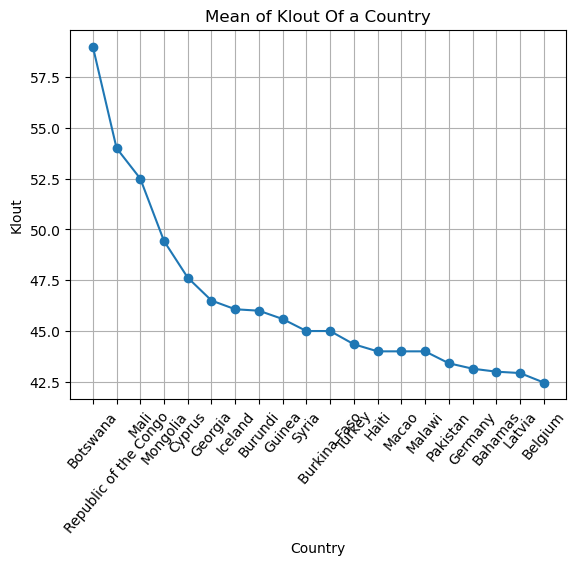

In [52]:
plt.plot(kpc['Country'], kpc['Klout'], marker='o')
plt.title('Mean of Klout Of a Country')
plt.xlabel('Country')
plt.ylabel('Klout')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

#### Inferences:
A significant portion of highly engaged tweets on Twitter, as measured by Klout scores, originate from African countries,with the notable exception of US.

### Language

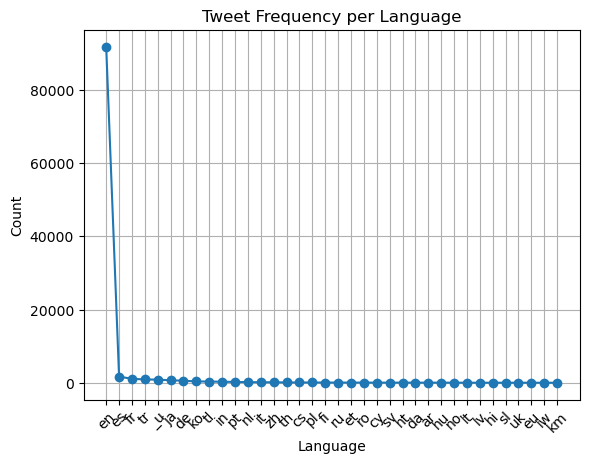

In [55]:
lang_counts = Final_df['Lang'].value_counts().reset_index()
lang_counts.columns = ['Language', 'Count']

plt.plot(lang_counts['Language'], lang_counts['Count'], marker='o')
plt.title('Tweet Frequency per Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()


#### Inference:
English reigns, yet a vibrant multilingual mix beckons: consider diverse engagement and non-English outreach.

## Coorelation Analysis

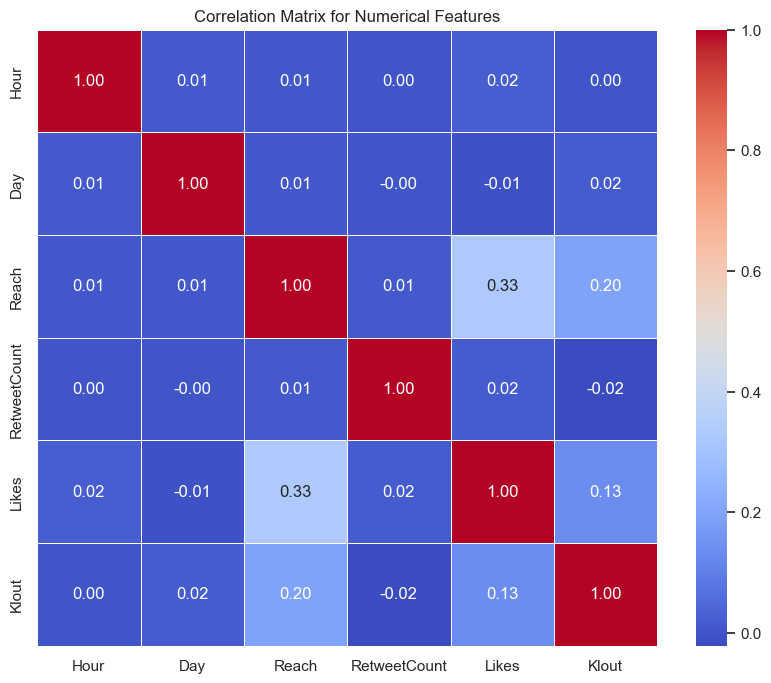

In [58]:
sns.set(style="whitegrid")

numerical_features = ['Hour', 'Day', 'Reach', 'RetweetCount', 'Likes', 'Klout']

correlation_matrix = Final_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

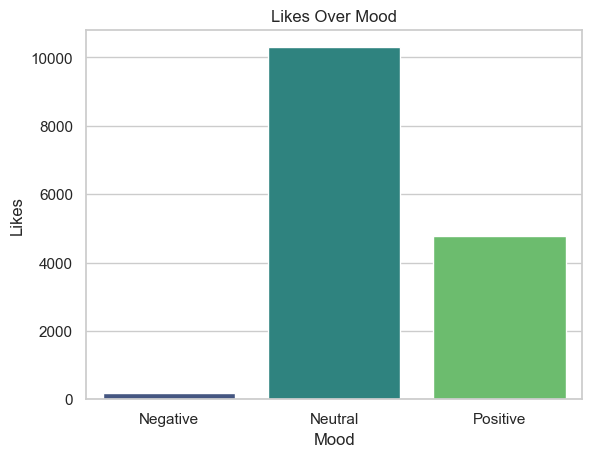

In [59]:
Final_df['Mood'] = Final_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

like_per_mood = Final_df.groupby('Mood')['Likes'].sum().reset_index()

sns.barplot(x='Mood', y='Likes', data=like_per_mood, palette='viridis')
plt.title('Likes Over Mood')
plt.xlabel('Mood')
plt.ylabel('Likes')
plt.show()

## Inference:
    Tweets with a neutral mood received more likes than negative tweets but less than positive tweets. This suggests that people are somewhat interested in neutral content, but it doesn't evoke the same strong emotions as positive or negative content.

#### Let's build a classification model by classifying our tweets in these three categories, namely:
## -Negative
## -Neutral
## -Positive

## Model Building:


#### Filter out non-English languages from the dataset.

In [64]:
Final_df = Final_df[Final_df['Lang']=='en']

#### Text processing

In [66]:
Final_df['text']=Final_df['text'].astype(str)
Final_df['text']=Final_df['text'].apply(lambda x:x.lower())

#### Removing the stop words [LIMIT-5000Characters]

In [68]:
cv=CountVectorizer(max_features=5000,stop_words='english')

In [69]:
vectors= cv.fit_transform(Final_df['text']).toarray()

In [70]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Substituting stem

In [72]:
ps=PorterStemmer()

In [73]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [74]:
Final_df['text']= Final_df['text'].apply(stem)

In [75]:
Final_df.head()

,UserID,Gender,LocationID,City,State,StateCode,Country,TweetID,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text,Mood
0,tw-1267804344,Unknown,1.0,Elbasan,Elbasan,AL,Albania,tw-698155297102295041,7,12,Friday,True,339.0,127.0,0.0,44.0,0.0,en,"""rt @adrianrusso82: our innov lab is offici op...",Neutral
1,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-685159757209059329,11,7,Thursday,False,87.0,0.0,0.0,22.0,0.0,en,now open aw asia pacif (seoul) region via /r/s...,Neutral
2,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-686907710311378944,6,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,a beginner' guid to scale to 11 million+ user ...,Neutral
3,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-686968158050201600,10,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,bridg aw and azur environ via vpn via /r/sysad...,Neutral
4,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-690210449674092545,9,21,Thursday,False,85.0,0.0,0.0,21.0,0.0,en,elk on aw elasticsearch servic + elasticbeanst...,Neutral


In [76]:

le_model = LabelEncoder()
Final_df['Label'] = le_model.fit_transform(Final_df['Mood'])

## Training model:

#### Splitting the dataset into testing and training sets:

In [79]:
X_train, X_test, y_train, y_test = train_test_split(Final_df['text'], Final_df['Label'],
                                                    test_size=0.2, random_state=42, stratify=Final_df['Label'])

In [80]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (73509,)
Shape of X_test:  (18378,)


## Model Training

In [82]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('random_forest', (RandomForestClassifier()))
])

In [83]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('random_forest', RandomForestClassifier())])

 The prevalence of neutral sentiment tweets far surpasses the relatively low count of negative tweets, making a meaningful comparison between the two challenging.

## Evaluation of the Model

In [86]:
# Get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

In [87]:
print(accuracy_score(y_test, y_pred))

0.9134835128958537


In [88]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.56      0.71      1014
           1       0.90      0.99      0.94     12286
           2       0.96      0.80      0.87      5078

    accuracy                           0.91     18378
   macro avg       0.95      0.78      0.84     18378
weighted avg       0.92      0.91      0.91     18378



## Testing our model:

In [90]:
test_df=Final_df.iloc[:50000, :]

In [91]:
test=Final_df['text'][1000]

In [92]:
test_text = test_df['text'][1000]
print(f"{test} ===> {test_df['Label'][1000]}")

aw - what' new! aw sdk for c++ - develop preview - the aw sdk for c++ is now in develop preview. sinc ... https://aws.amazon.com/about-aws/whats-new/2016/03/aws-sdk-for-c-plus-plus-developer-preview/ ===> 1


In [93]:
test = clf.predict([test_text])

In [94]:
classes = ['Negative', 'Neutral', 'Positive']

print(f"True Label: {test_df['Mood'][1000]}")
print(f'Predict Label: {classes[test[0]]}')

True Label: Neutral
Predict Label: Neutral


### Conclusion:
    We have analysed the sentiment of the tweet with the accuracy :
    91% .